In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline
#import seaborn as sns

In [2]:
data = pd.read_csv('../data/churn_train.csv')

In [3]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0


In [4]:
clean = pd.read_csv('../alex_cross/cleaned_data.csv', index_col = 0)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null object
phone                     39681 non-null object
signup_date               40000 non-null object
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [6]:
nona = data.dropna()

In [7]:
print('iPhone: {}'.format(sum(np.where(nona.phone == 'iPhone',1,0))))
print('Android: {}'.format(sum(np.where(nona.phone == 'Android',1,0))))

iPhone: 23438
Android: 9694


In [8]:
nona.phone.unique()

array(['Android', 'iPhone'], dtype=object)

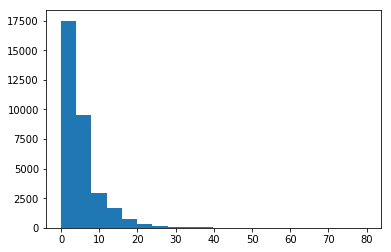

In [9]:
plt.hist(nona.avg_dist, bins = 20);

''

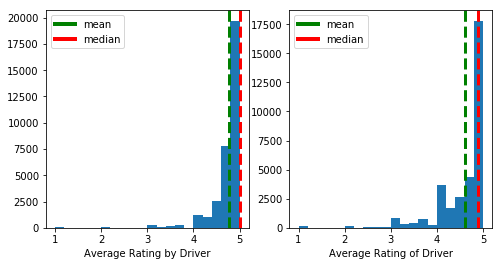

In [10]:
fig, ax = plt.subplots(1,2, figsize = (8,4))

x0 = nona.avg_rating_by_driver
x1 = nona.avg_rating_of_driver

custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='red', lw=4)]

ax[0].hist(x0, bins = 20)
ax[0].axvline(np.mean(x0), color = 'green',
              linewidth = 3, linestyle = '--')
ax[0].axvline(np.median(x0), color = 'red', 
              linewidth = 3, linestyle = '--')
ax[0].set_xlabel('Average Rating by Driver')
ax[0].legend(custom_lines, ['mean', 'median'])

ax[1].hist(x1, bins = 20)
ax[1].axvline(np.mean(x1), color = 'green', 
              linewidth = 3, linestyle = '--')
ax[1].axvline(np.median(x1), color = 'red', 
              linewidth = 3, linestyle = '--')
ax[1].set_xlabel('Average Rating of Driver')

ax[1].legend(custom_lines, ['mean', 'median'])
;

In [11]:
categories = ['avg_rating_of_driver','avg_rating_by_driver']
print('category              mean   median')
for i in categories:
    print('{0}: {1:.2f}    {2}'.format(i,
                            np.mean(nona[i]),
                            np.median(nona[i])))

category              mean   median
avg_rating_of_driver: 4.60    4.9
avg_rating_by_driver: 4.78    5.0


In [12]:
data['churn'] = np.where(data['last_trip_date']<='2014-06-01', '1', '0')

In [13]:
data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,40000.000000,39838.000000,33472.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,5.791302,4.777434,4.601697,1.074956,8.857342,2.280700,60.874382
std,5.708056,0.448088,0.614810,0.222427,20.014008,3.811289,37.089619
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.930000,5.000000,5.000000,1.050000,8.300000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [14]:
data.head(nona.avg)

AttributeError: 'DataFrame' object has no attribute 'avg'

In [ ]:
data.info()

In [ ]:
plt.hist

In [15]:
categoricals = ['city','phone','luxury_car_user']
print('variable         categories')
for i in categoricals:
    print('{0}: {1}'.format(i,np.unique(nona[i])))

variable         categories
city: ['Astapor' "King's Landing" 'Winterfell']
phone: ['Android' 'iPhone']
luxury_car_user: [False  True]


In [16]:
np.max(nona.last_trip_date)

'2014-07-01'

In [17]:
np.max(nona.signup_date)

'2014-01-31'

In [18]:
np.min(nona.signup_date)

'2014-01-01'

In [19]:
nona.city.value_counts()

Winterfell        15265
Astapor           10824
King's Landing     7043
Name: city, dtype: int64

In [20]:
nona.luxury_car_user.value_counts()

False    20447
True     12685
Name: luxury_car_user, dtype: int64

''

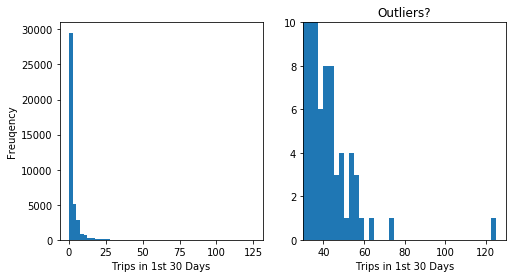

In [21]:
fig, ax = plt.subplots(1,2, figsize = (8,4))

ax[0].hist(data.trips_in_first_30_days, bins = 50)
ax[0].set_xlabel('Trips in 1st 30 Days')
ax[0].set_ylabel('Freuqency')

ax[1].hist(data.trips_in_first_30_days, bins = 50)
ax[1].set_xlim([30,130])
ax[1].set_ylim([0,10])
ax[1].set_xlabel('Trips in 1st 30 Days')
ax[1].set_title('Outliers?')
;

In [22]:
np.max(nona.trips_in_first_30_days)

125

In [23]:
np.sum(nona.trips_in_first_30_days > 60)

3

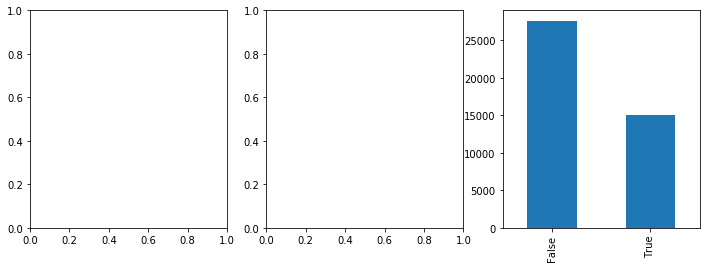

In [24]:
fig, ax = plt.subplots(1,3, figsize = (12,4))

cols = ['city','phone','luxury_car_user']

for i, col in enumerate(cols):
    ax[0] = data[col].value_counts().plot(kind='bar')
#                                     figsize=(6,4),
#                                     title="Cities")

# ax[0] = data['city'].value_counts().plot(kind='bar',
#                                     figsize=(6,4),
#                                     title="Cities")
# ax[0].set_xlabel("City")
# ax[0].set_ylabel("Frequency")

# ax[1] = data['phone'].value_counts().plot(kind='bar',
#                                     figsize=(6,4),
#                                     title="phone type")
# ax[1].set_xlabel("phone")
# ax[1].set_ylabel("Frequency")

#plt.tight_layout()
#plt.show()

Text(0.5, 0, 'Churn')

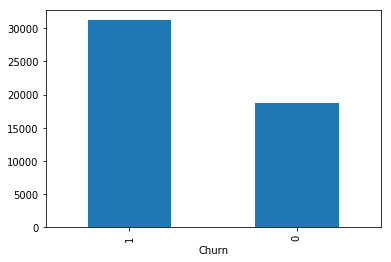

In [25]:
fig, ax = plt.subplots()

ax = clean['churn'].value_counts().plot(kind='bar')
ax.set_xlabel('Churn')

In [26]:
clean.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,total_days_january,churn,city_Astapor,city_King's Landing,phone_Android,phone_iPhone,luxury_car_user_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,25,0,0,1,0,1,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,29,1,1,0,1,0,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,6,1,1,0,0,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,10,0,0,1,0,1,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,27,1,0,0,1,0,0


''

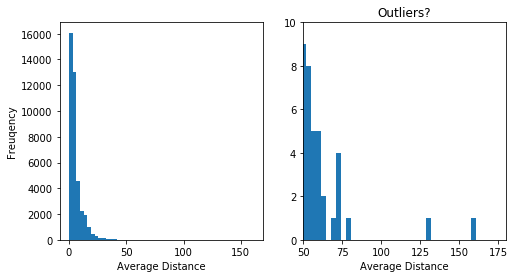

In [27]:
fig, ax = plt.subplots(1,2, figsize = (8,4))

ax[0].hist(data.avg_dist, bins = 50)
ax[0].set_xlabel('Average Distance')
ax[0].set_ylabel('Freuqency')

ax[1].hist(data.avg_dist, bins = 50)
ax[1].set_xlim([50,180])
ax[1].set_ylim([0,10])
ax[1].set_xlabel('Average Distance')
ax[1].set_title('Outliers?')
;

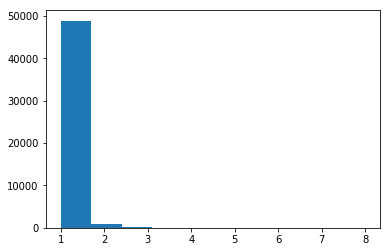

In [28]:
plt.hist(clean.avg_surge)
plt.ylim = (0,100)

(array([3.8048e+04, 4.1320e+03, 2.8500e+03, 1.5250e+03, 3.5400e+02,
        1.4050e+03, 2.1500e+02, 3.9000e+01, 1.6000e+01, 1.4160e+03]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

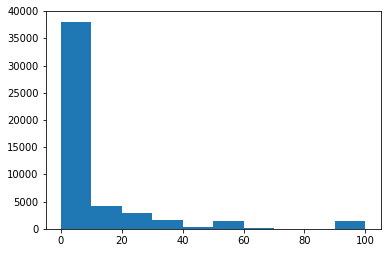

In [29]:
plt.hist(clean.surge_pct)

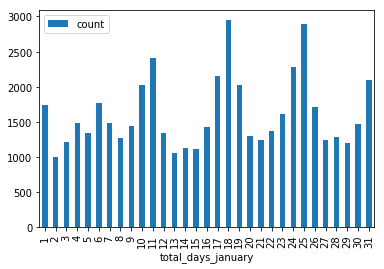

In [30]:
january = clean.total_days_january
january = np.sort(january)
january = clean.groupby('total_days_january').total_days_january.agg(['count'])
january.plot(kind='bar');

''

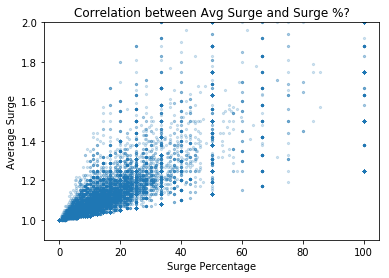

In [31]:
fig, ax = plt.subplots()

ax.scatter(clean.surge_pct,clean.avg_surge, alpha = .2, s = 5)
ax.set_xlabel('Surge Percentage')
ax.set_ylabel('Average Surge')
ax.set_ylim(.9,2)
ax.set_title('Correlation between Avg Surge and Surge %?')
;

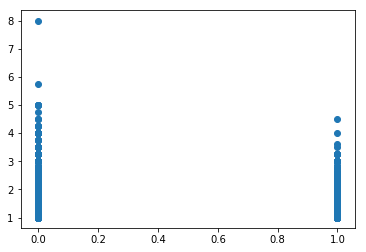

In [32]:
plt.scatter(clean.luxury_car_user_True,clean.avg_surge)

TypeError: 'AxesSubplot' object is not subscriptable

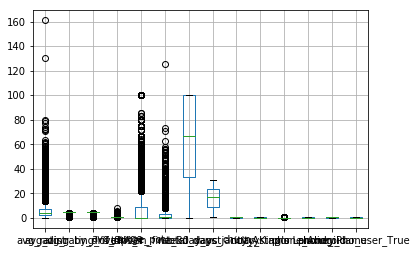

In [33]:
fig, ax = plt.subplots()
df = clean
bp = df.boxplot(ax=ax)
yval = np.concatenate([line.get_ydata() for line in bp['whiskers']])
eps = 1.0
ymin, ymax = yval.min()-eps, yval.max()+eps
ax.set_ylim([ymin,ymax])
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.boxplot([clean, d2, d2[::2, 0]])

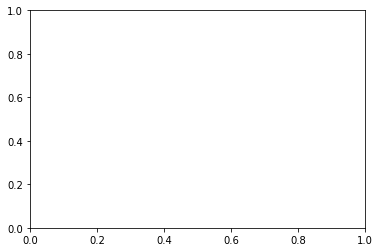

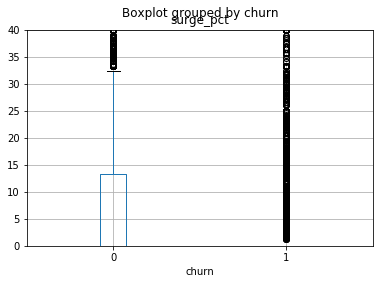

In [64]:
fig, ax = plt.subplots()
ax = clean.boxplot(column='surge_pct',by='churn', showfliers=True)
ax.set_ylim(0, 40);

In [65]:
np.sum(clean.surge_pct)

442476.79999999993

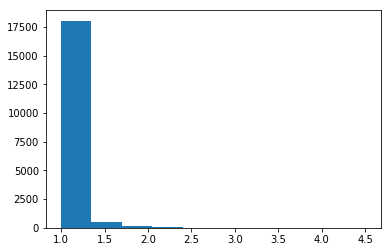

In [70]:
plt.hist(clean[clean.churn == 0].avg_surge, bins = 10);

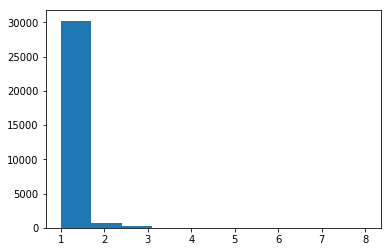

In [72]:
plt.hist(clean[clean.churn == 1].avg_surge, bins = 10)
plt.set_ylim = (0,100);

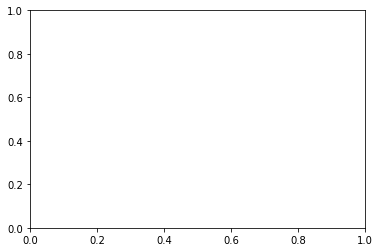

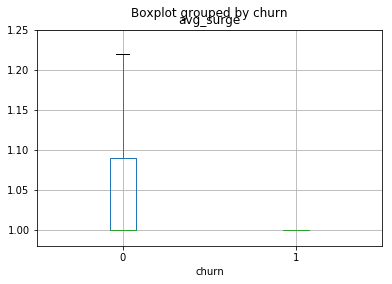

In [77]:
fig, ax = plt.subplots()
ax = clean.boxplot(column='avg_surge',by='churn', showfliers=False)
ax.set_ylim(.98, 1.25);

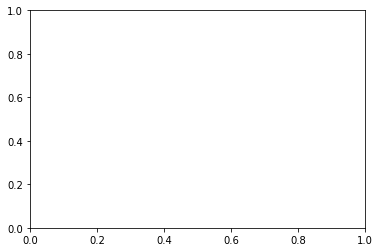

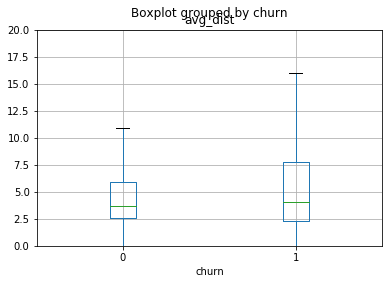

In [50]:
fig, ax = plt.subplots()
ax = clean.boxplot(column='avg_dist',by='churn', showfliers=False)
ax.set_ylim(0, 20);

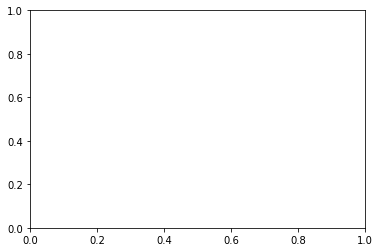

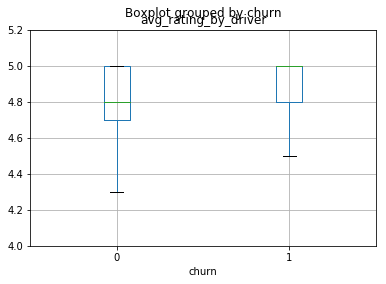

In [51]:
fig, ax = plt.subplots()
ax = clean.boxplot(column='avg_rating_by_driver',by='churn', showfliers=False)
ax.set_ylim(4, 5.2);

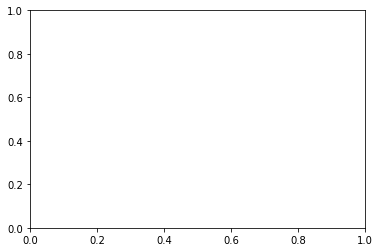

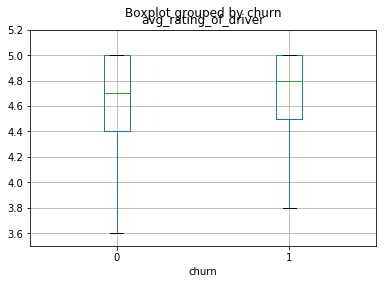

In [52]:
fig, ax = plt.subplots()
ax = clean.boxplot(column='avg_rating_of_driver',by='churn', showfliers=False)
ax.set_ylim(3.5, 5.2);

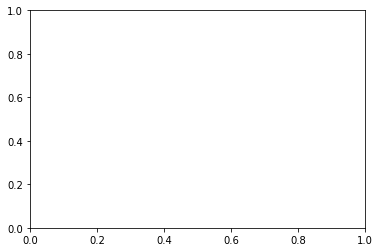

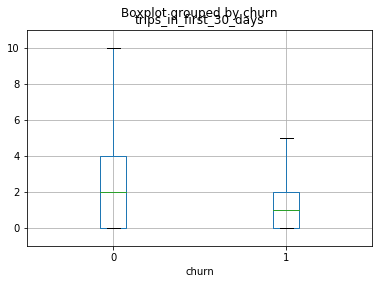

In [54]:
fig, ax = plt.subplots()
ax = clean.boxplot(column='trips_in_first_30_days',by='churn', showfliers=False)
ax.set_ylim(-1, 11);